In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
# Any results you write to the current directory are saved as output.
# linear algebra

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

In [2]:
train = pd.read_csv("/Users/shekibghafary/downloads/train.csv")

In [3]:
train[['Pclass','Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


# Direct Correlation between Class and Survival

In [4]:
train[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [5]:
train[['SibSp','Survived']].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [6]:
test = pd.read_csv('/Users/shekibghafary/downloads/test.csv')

In [7]:
train['Sex'] = train.Sex.map({'male': 0, 'female': 1})
test['Sex'] = test.Sex.map({'male': 0, 'female': 1})

In [8]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
train.Age = train.Age.fillna(train.Age.median())

In [10]:
train.Embarked.mode()

0    S
dtype: object

In [11]:
train.Embarked[61]

nan

In [12]:
train.Embarked = train.Embarked.fillna('S')

In [13]:
train.Embarked[61]

'S'

In [14]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [15]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",0,28.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C


In [16]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [17]:
train['Cabin'] = train['Cabin'].str[0]
test['Cabin'] = test['Cabin'].str[0]
test.Cabin.replace('N','Null')
train.Cabin.replace('N','Null')

0      NaN
1        C
2      NaN
3        C
4      NaN
5      NaN
6        E
7      NaN
8      NaN
9      NaN
10       G
11       C
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21       D
22     NaN
23       A
24     NaN
25     NaN
26     NaN
27       C
28     NaN
29     NaN
      ... 
861    NaN
862      D
863    NaN
864    NaN
865    NaN
866    NaN
867      A
868    NaN
869    NaN
870    NaN
871      D
872      B
873    NaN
874    NaN
875    NaN
876    NaN
877    NaN
878    NaN
879      C
880    NaN
881    NaN
882    NaN
883    NaN
884    NaN
885    NaN
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin, Length: 891, dtype: object

In [18]:
test.Embarked.mode()

0    S
dtype: object

In [19]:
test.Embarked = test.Embarked.fillna('S')

In [20]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [21]:
test.Fare = test.Fare.fillna(test.Fare.mean())

In [22]:
test.Age = test.Age.fillna(test.Age.median())

In [23]:
train.Embarked[train.Embarked == 'S'] = 0
train.Embarked[train.Embarked == 'C'] = 1
train.Embarked[train.Embarked == 'Q'] = 2
test.Embarked[test.Embarked == 'S'] = 0
test.Embarked[test.Embarked == 'C'] = 1
test.Embarked[test.Embarked == 'Q'] = 2

/Users/shekibghafary/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/shekibghafary/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/shekibghafary/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we c

In [24]:
train['Prefix'] = train['Name'].apply(lambda x: x.split(', ')).str[1].apply(lambda x: x.split('.')).str[0]
test['Prefix'] = test['Name'].apply(lambda x: x.split(', ')).str[1].apply(lambda x: x.split('.')).str[0]

In [25]:
train['Prefix'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [26]:
train['Prefix'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [27]:
test['Prefix'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [28]:
train.Prefix = train.Prefix.replace(['Miss','Ms','Dona','Mlle', 'the Countess', 'Mme'], 'Mrs')
train.Prefix = train.Prefix.replace(['Don','Master','Don','Rev', 'Major', 'Sir', 'Col', 'Capt', 'Jonkheer'], 'Mr')

In [29]:
test.Prefix = test.Prefix.replace(['Miss','Ms','Dona'], 'Mrs')
test.Prefix = test.Prefix.replace(['Master','Col','Rev'], 'Mr')

In [30]:
test['Prefix'].unique()

array(['Mr', 'Mrs', 'Dr'], dtype=object)

In [31]:
train.Prefix[train.Prefix == 'Mr'] = 0
train.Prefix[train.Prefix == 'Mrs'] = 1
train.Prefix[train.Prefix == 'Dr'] = 2
test.Prefix[test.Prefix == 'Mr'] = 0
test.Prefix[test.Prefix == 'Mrs'] = 1
test.Prefix[test.Prefix == 'Dr'] = 2

/Users/shekibghafary/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/shekibghafary/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/shekibghafary/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we c

In [32]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0,1
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,NaN,0,0
6,898,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,7.6292,NaN,2,1
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.0000,NaN,0,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,2657,7.2292,NaN,1,1
9,901,3,"Davies, Mr. John Samuel",0,21.0,2,0,A/4 48871,24.1500,NaN,0,0


In [33]:
train[['Cabin', 'Survived']].groupby(['Cabin']).mean().sort_values(by='Survived', ascending = True)

,Survived
Cabin,
T,0.000000
A,0.466667
G,0.500000
C,0.593220
F,0.615385
B,0.744681
E,0.750000
D,0.757576


In [34]:
train['total_family'] = train['SibSp'] + train['Parch']
test['total_family'] = test['SibSp'] + test['Parch']
train[['total_family', 'Survived']].groupby(['total_family']).mean().sort_values(by='Survived', ascending = True)

,Survived
total_family,
7,0.000000
10,0.000000
5,0.136364
4,0.200000
0,0.303538
6,0.333333
1,0.552795
2,0.578431
3,0.724138


In [35]:
train = train.drop(['Ticket', 'Fare', 'SibSp', 'Parch'], axis = 1)

In [36]:
test = test.drop(['Ticket', 'Fare', 'SibSp', 'Parch'], axis = 1)

## Data Visualization

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
import seaborn as sns

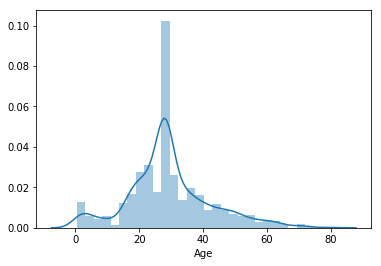

In [39]:
sns.distplot(train.Age.dropna())

In [64]:
train.Sex.value_counts()

0    577
1    314
Name: Sex, dtype: int64

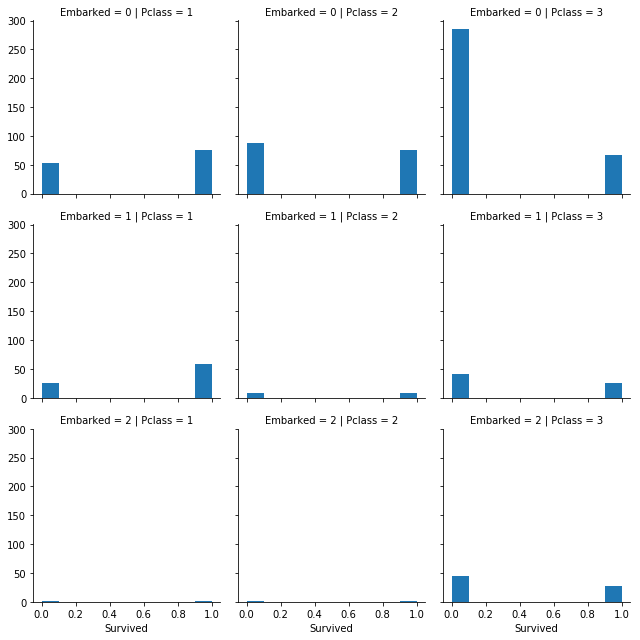

In [41]:
g= sns.FacetGrid(data = train, row = 'Embarked', col='Pclass')
g.map(plt.hist, "Survived")

## Modeling
Build a linear model to predict the survived rate

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
lgcls = LogisticRegression()

In [44]:
test

,PassengerId,Pclass,Name,Sex,Age,Cabin,Embarked,Prefix,total_family
0,892,3,"Kelly, Mr. James",0,34.5,NaN,2,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,NaN,0,1,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,NaN,2,0,0
3,895,3,"Wirz, Mr. Albert",0,27.0,NaN,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,NaN,0,1,2
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,NaN,0,0,0
6,898,3,"Connolly, Miss. Kate",1,30.0,NaN,2,1,0
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,NaN,0,0,2
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,NaN,1,1,0
9,901,3,"Davies, Mr. John Samuel",0,21.0,NaN,0,0,2


In [45]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,total_family
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.361582,0.904602
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.613459
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,10.000000


In [46]:
X_train = np.asarray(train.drop(['Survived'], axis = 1))
X_train = StandardScaler().fit(X_train).transform(X_train)
X_train[0:5]

ValueError: could not convert string to float: Lady

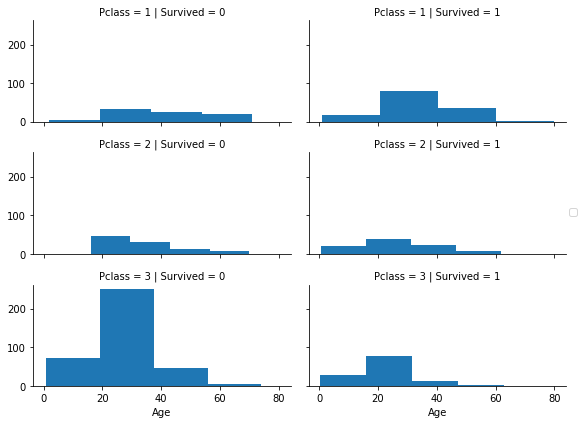

In [47]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2, aspect=2)
grid.map(plt.hist, 'Age', alpha=1, bins=4)
grid.add_legend();

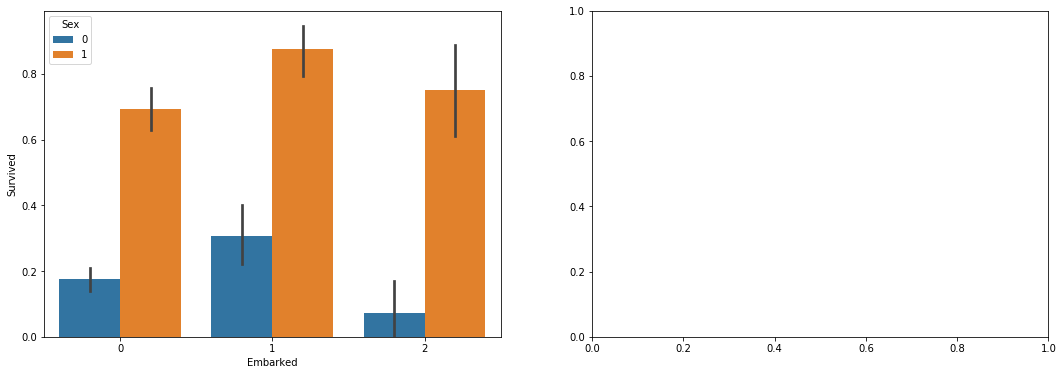

In [77]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(18,6))
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=train, ax = axis1);

In [85]:
# X_train (all features for training purpose but excluding Survived),
# Y_train (survival result of X-Train) and test are our 3 main datasets for the next sections
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_train.shape, Y_train.shape, test.shape

from sklearn.cross_validation import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=101)

X_test = test.copy() # test data for Kaggle submission
#std_scaler = StandardScaler()
#X_train = std_scaler.fit_transform(X_train)
#X_test = std_scaler.transform(X_test)


/Users/shekibghafary/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [86]:
X = train.drop('Survived', axis = 1)
Y = train['Survived']

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [88]:
X_train.dtypes

PassengerId       int64
Pclass            int64
Name             object
Sex               int64
Age             float64
Cabin            object
Embarked         object
Prefix           object
total_family      int64
dtype: object

In [ ]:
from sklearn import preprocessing


In [ ]:
pred

## Submission

In [49]:
test = pd.read_csv("/Users/shekibghafary/downloads/test.csv")

In [50]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [51]:
test.shape

(418, 11)

In [52]:
passId = test.PassengerId

In [53]:
submissions = pd.DataFrame({'PassengerId': passId, 'Survived':pred})
submissions

NameError: name 'pred' is not defined

In [54]:
submissions.to_csv("submissions_lg.txt", index=None)

NameError: name 'submissions' is not defined

In [97]:
Y_train = train['Survived'].astype(int)
X_train = train.drop(['Survived'], axis=1)
X_train.drop(labels=["PassengerId"], axis=1, inplace=True)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [128]:
train = train.drop([891], axis=0)
clf_log = LogisticRegression()
clf_log.fit(X_train, Y_train)
acc_log = round(clf_log.score(X_train, Y_train)*100, 2)
acc_log

ValueError: labels [891] not contained in axis

In [95]:
test['Survived'] = log_clf.predict(test[Selected_features])
#submission = final_test[['PassengerId','Survived']]
#submission.to_csv("submission.csv", index=False)
submission.tail()

NameError: name 'log_clf' is not defined

In [122]:
clf_knc = KNeighborsClassifier()
clf_knc.fit(X_train, Y_train)
acc_knc = round(clf_knc.score(X_train, Y_train)*100, 2)
acc_knc

ValueError: could not convert string to float: Lady

In [124]:
clf_gc = GaussianNB();
clf_gc.fit(X_train, Y_train)
acc_gc = round(clf_gc.score(X_train, Y_train)*100)
acc_gc

ValueError: could not convert string to float: Lady

In [127]:
test.Name.astype(float) 

ValueError: could not convert string to float: Peter, Master. Michael J